In [17]:
from datetime import datetime
import pandas as pd
import nest_asyncio
from binance.client import Client
import json
import time
import requests
import numpy as np
import matplotlib.pyplot as plt
client = Client('', '')

In [18]:
DAYS = '2100 day ago UTC'
KLINE_INTERVAL = client.KLINE_INTERVAL_1DAY
# Resemple period days
RESEMPLE_PERIOD = 1
SYMBOLS1 = ['ALICEUSDT', 'APEUSDT', 'MANAUSDT', 'SANDUSDT', 'AXSUSDT', 'IMXUSDT', 'GALAUSDT', 'DARUSDT', 'GMTUSDT',
            'MAGICUSDT', 'ETHUSDT']
defi = ['UNIUSDT', 'AAVEUSDT', 'CRVUSDT', 'MKRUSDT', 'SNXUSDT', 'BALUSDT', 'CVXUSDT', 'DYDXUSDT', 'LINKUSDT',
       '1INCHUSDT', 'COMPUSDT', 'FXSUSDT', 'LDOUSDT','SUSHIUSDT', 'YFIUSDT', 'ENSUSDT']
SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'XRPUSDT', 'SOLUSDT', 'DOGEUSDT', 'DOTUSDT', 'MATICUSDT', 'SHIBUSDT',\
     'AVAXUSDT', 'TRXUSDT', 'FTTUSDT','LTCUSDT', 'ETCUSDT', 'UNIUSDT', 'LINKUSDT', 'ATOMUSDT', 'NEARUSDT', 'XLMUSDT',\
     'XMRUSDT', 'BCHUSDT', 'ALGOUSDT', 'APEUSDT', 'VETUSDT', 'FLOWUSDT', 'ICPUSDT', 'MANAUSDT', 'SANDUSDT', 'FXSUSDT',\
     'HBARUSDT', 'XTZUSDT', 'AXSUSDT', 'FILUSDT', 'THETAUSDT', 'EGLDUSDT', 'AAVEUSDT', 'EOSUSDT', 'HNTUSDT', \
     'BTTUSDT', 'MKRUSDT', 'FTMUSDT', 'IOTAUSDT', 'LDOUSDT', 'KLAYUSDT', 'GRTUSDT', 'RUNEUSDT', 'SNXUSDT', 'ZECUSDT', \
     'NEOUSDT', 'ARUSDT', 'GMTUSDT', 'ZILUSDT', 'KSMUSDT', 'ENJUSDT', 'WAVESUSDT', 'DASHUSDT', 'CAKEUSDT', \
     'CRVUSDT', 'LRCUSDT', 'CVXUSDT', 'XEMUSDT', 'KAVAUSDT', 'MINAUSDT', 'ONEUSDT', 'DYDXUSDT', 'GLMRUSDT', \
     'IMXUSDT', 'BALUSDT', 'GALUSDT', 'TRUUSDT', 'ALICEUSDT', 'DODOUSDT', 'STGUSDT', 'SRMUSDT',
          'APTUSDT', 'GALAUSDT', 'RAYUSDT', 'ICXUSDT']
ethereum_killers = ['AVAXUSDT', 'SOLUSDT', 'ATOMUSDT', 'NEARUSDT', 'DOTUSDT', 'MATICUSDT', 'APTUSDT', 'FTMUSDT', 'ALGOUSDT']
metaverse = ['TLMUSDT','ALICEUSDT', 'APEUSDT', 'MANAUSDT', 'SANDUSDT', 'AXSUSDT', 'IMXUSDT', 'GALAUSDT', 'DARUSDT', 'GMTUSDT',
            'MAGICUSDT']
blockchains = ['BTCUSDT', 'BNBUSDT', 'ADAUSDT', 'XRPUSDT', 'SOLUSDT', 'DOTUSDT', 'MATICUSDT', 'APTUSDT',
              'AVAXUSDT', 'TRXUSDT','LTCUSDT', 'ETCUSDT','ATOMUSDT', 'NEARUSDT', 'XLMUSDT','XMRUSDT', 'BCHUSDT', 'ALGOUSDT',
              'FLOWUSDT', 'ICPUSDT','HBARUSDT', 'XTZUSDT','EOSUSDT','NEOUSDT','ZILUSDT','ONEUSDT', 'FTMUSDT',
              'VETUSDT', 'EGLDUSDT', 'WAVESUSDT', 'DASHUSDT']
blockchains_old = [ 'ADAUSDT', 'XRPUSDT', 'MATICUSDT',
             'TRXUSDT','LTCUSDT', 'ETCUSDT','ATOMUSDT', 'NEARUSDT', 'XLMUSDT','XMRUSDT', 'BCHUSDT', 'ALGOUSDT',
               'HBARUSDT', 'XTZUSDT','EOSUSDT','NEOUSDT','ZILUSDT', 'FTMUSDT',
              'VETUSDT', 'EGLDUSDT', 'WAVESUSDT', 'DASHUSDT', 'ICXUSDT', 'OMGUSDT', 
                  'ONTUSDT', 'QTUMUSDT', 'ONEUSDT', 'DOGEUSDT', 'ZECUSDT']
# Meme = []
def get_binance_futures_tickers():
    url = 'https://fapi.binance.com/fapi/v1/ticker/24hr'
    response = requests.get(url)
    data = response.json()
    # print(data)
    futures_tickers = [ticker['symbol'] for ticker in data if 'USDT' in ticker['symbol']]
    return futures_tickers

tickers = get_binance_futures_tickers()
# print(tickers)
tik2 = ['MINAUSDT', 'FILUSDT', 'CELOUSDT', 'RNDRUSDT', 'LRCUSDT', 'GRTUSDT', 'HOTUSDT', 'DOGEUSDT',  'ZENUSDT', 'SCUSDT', 'ENJUSDT', 'JASMYUSDT', 'SANDUSDT', 'EGLDUSDT', 'ZECUSDT', 'CVCUSDT', 'ONEUSDT', 'SRMUSDT', 'ANTUSDT', 'ALICEUSDT', 'COMPUSDT', 'SKLUSDT', 'STORJUSDT', 'KAVAUSDT', 'NEARUSDT', 'BALUSDT', 'HNTUSDT', 'CRVUSDT', 'HBARUSDT', 'SNXUSDT', 'THETAUSDT', 'BTCUSDT', 'RVNUSDT', 'FETUSDT', 'INJUSDT', 'IMXUSDT', 'BTSUSDT', 'ETCUSDT', 'TRBUSDT', 'TUSDT', 'SOLUSDT', 'BNBUSDT', 'HIGHUSDT', 'AVAXUSDT', 'IOTXUSDT', 'APTUSDT', 'UNFIUSDT', 'LPTUSDT', 'BTCDOMUSDT', 'DARUSDT', 'TRXUSDT', 'FLOWUSDT', 'DYDXUSDT', 'AXSUSDT', 'DGBUSDT', 'KLAYUSDT', 'WOOUSDT', 'UNIUSDT', 'ANKRUSDT', 'PEOPLEUSDT', 'STMXUSDT', 'RUNEUSDT', 'VETUSDT', 'BCHUSDT', 'COTIUSDT', 'TOMOUSDT', 'MKRUSDT', 'XEMUSDT', 'SFPUSDT', 'GALAUSDT', 'HOOKUSDT', 'CHZUSDT', 'XRPUSDT', 'DASHUSDT', 'APEUSDT', 'QNTUSDT', 'MAGICUSDT', 'SPELLUSDT', 'KSMUSDT', 'BANDUSDT', 'OCEANUSDT', 'OPUSDT', 'RSRUSDT', 'STGUSDT', 'MATICUSDT', 'CTSIUSDT', 'DUSKUSDT', 'EOSUSDT', 'BNXUSDT', 'MTLUSDT', 'API3USDT', 'XTZUSDT', 'ATAUSDT', 'ARUSDT',  'NKNUSDT', 'RLCUSDT', 'XLMUSDT', 'LITUSDT', '1INCHUSDT', 'ONTUSDT', 'DEFIUSDT', 'REEFUSDT', 'ARPAUSDT', 'OGNUSDT', 'ZILUSDT', 'DOTUSDT', 'LUNA2USDT', 'SXPUSDT', 'CTKUSDT', 'LINAUSDT', 'FXSUSDT', 'CELRUSDT', 'ADAUSDT', 'ICXUSDT', 'RENUSDT', 'ALGOUSDT', 'FTTUSDT', 'KNCUSDT', 'BELUSDT', 'RAYUSDT', 'BLZUSDT', 'ZRXUSDT', 'OMGUSDT', 'ATOMUSDT', 'ETHUSDT', 'BAKEUSDT', 'GALUSDT', 'CVXUSDT', '1000LUNCUSDT', 'ALPHAUSDT', 'LTCUSDT', '1000SHIBUSDT',  'AUDIOUSDT', 'XMRUSDT', 'AAVEUSDT', 'IOTAUSDT', 'NEOUSDT', 'CHRUSDT', 'IOSTUSDT', 'ROSEUSDT', 'BATUSDT', 'GTCUSDT', 'LINKUSDT', 'YFIUSDT', 'TLMUSDT', 'QTUMUSDT', 'DENTUSDT', 'LDOUSDT', 'C98USDT', 'SUSHIUSDT', 'MANAUSDT', 'GMTUSDT', 'MASKUSDT', 'FLMUSDT', 'ENSUSDT', 'ICPUSDT', 'FTMUSDT', 'WAVESUSDT']

In [19]:
import asyncio
import pandas as pd
from binance import AsyncClient, BinanceSocketManager


async def get_prices_klines_df(symbol, client):
    print(f"Getting data for {symbol}")
    try:
        klines = await client.get_historical_klines(symbol, KLINE_INTERVAL, DAYS)
    except:
        print(f"Skipping symbol {symbol}")
        return None
    df = pd.DataFrame(klines, columns=['date', 'open', 'high', 'low', 'close', 'volume',
                                        'close_time', 'quote_asset_volume', 'number_of_trades',
                                        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    df = df.set_index('date')
    df.drop(['open', 'high', 'low', 'volume', 'close_time', 'quote_asset_volume',
             'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'], axis=1, inplace=True)
    df.rename(columns={'close':symbol}, inplace=True)
    df[symbol] = pd.to_numeric(df[symbol])
    return df

async def get_all_klines(symbols):
    client = await AsyncClient.create()
    tasks = [get_prices_klines_df(symbol, client) for symbol in symbols]
    results = await asyncio.gather(*tasks)
    await client.close_connection()
    return pd.concat(results, axis=1)

def concat_df(df):
    eth_price_df = df[['ETHUSDT']]
    cols = df.columns.tolist()
    for sym in cols:
        if sym != 'ETHUSDT':
            df[sym] = df[sym].astype(float)
            df['ETHUSDT'] = df['ETHUSDT'].astype(float)
            df[sym] = df[sym] / df['ETHUSDT']
    df = df.drop(['ETHUSDT'], axis=1)
    df = pd.concat([df, eth_price_df], axis=1)
    return df

nest_asyncio.apply()
df = asyncio.run(get_all_klines(tickers))
df1 = concat_df(df)


Getting data for BALUSDT
Getting data for RVNUSDT
Getting data for LDOUSDT
Getting data for MATICUSDT
Getting data for STGUSDT
Getting data for IOSTUSDT
Getting data for ICXUSDT
Getting data for ENJUSDT
Getting data for FLOWUSDT
Getting data for SNXUSDT
Getting data for AAVEUSDT
Getting data for XLMUSDT
Getting data for BTCDOMUSDT
Getting data for TRBUSDT
Getting data for ONTUSDT
Getting data for COCOSUSDT
Getting data for LEVERUSDT
Getting data for TLMUSDT
Getting data for FETUSDT
Getting data for FOOTBALLUSDT
Getting data for IDUSDT
Getting data for RUNEUSDT
Getting data for IOTAUSDT
Getting data for ALPHAUSDT
Getting data for LITUSDT
Getting data for JOEUSDT
Getting data for KAVAUSDT
Getting data for OCEANUSDT
Getting data for TOMOUSDT
Getting data for MKRUSDT
Getting data for 1000XECUSDT
Getting data for FLMUSDT
Getting data for JASMYUSDT
Getting data for COMPUSDT
Getting data for FTMUSDT
Getting data for ARUSDT
Getting data for RENUSDT
Getting data for HOTUSDT
Getting data for HIG

In [20]:
df1
eth = df1['ETHUSDT']
df1 = df1.drop(['ETHUSDT'], axis=1)

             TLMUSDT  ALICEUSDT   APEUSDT  MANAUSDT  SANDUSDT   AXSUSDT  \
date                                                                      
2020-01-01       NaN        NaN       NaN       NaN       NaN       NaN   
2020-01-02       NaN        NaN       NaN       NaN       NaN       NaN   
2020-01-03       NaN        NaN       NaN       NaN       NaN       NaN   
2020-01-04       NaN        NaN       NaN       NaN       NaN       NaN   
2020-01-05       NaN        NaN       NaN       NaN       NaN       NaN   
...              ...        ...       ...       ...       ...       ...   
2023-04-01  0.000011   0.000866  0.002338  0.000327  0.000349  0.004668   
2023-04-02  0.000011   0.000873  0.002332  0.000335  0.000343  0.004631   
2023-04-03  0.000011   0.000871  0.002354  0.000326  0.000343  0.004562   
2023-04-04  0.000011   0.000863  0.002264  0.000319  0.000339  0.004496   
2023-04-05  0.000011   0.000842  0.002216  0.000316  0.000338  0.004442   

             IMXUSDT  GA

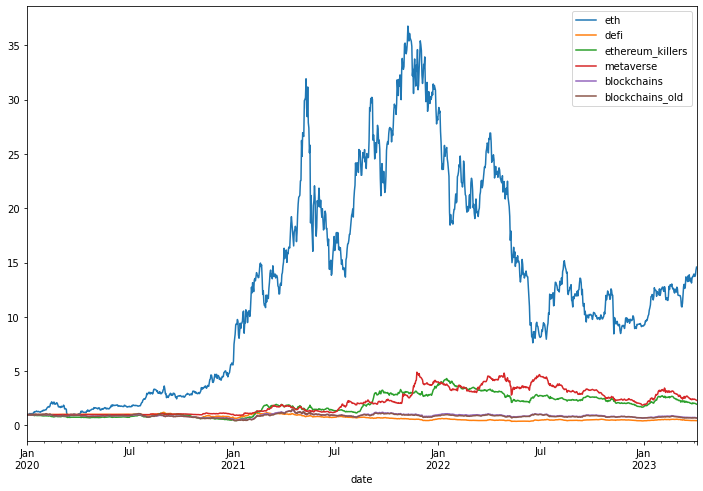

In [5]:
# ethereum_killers_df = df1.loc[:, ethereum_killers]
# ethereum_killers_df
# ethereum_killers_df = df1[ethereum_killers]
# ethereum_killers_returns = ethereum_killers_df.sum(axis=1).pct_change()
# print(ethereum_killers_returns)
def create_sectors(prices_df, eth):
    eth_returns = eth.pct_change()
    eth_logs = np.log(eth_returns + 1)
    defi_df = prices_df[defi]
    # Calculate the daily returns of the Ethereum Killers sector
    defi_df_returns = (defi_df.pct_change()/ len(defi_df.columns)).sum(axis=1)
    defi_df_log_returns = np.log(defi_df_returns + 1)
    # Filter the DataFrame to include only the Ethereum Killers tokens
    ethereum_killers_df = prices_df[ethereum_killers]
    # Calculate the daily returns of the Ethereum Killers sector
    ethereum_killers_returns = (ethereum_killers_df.pct_change()/ len(ethereum_killers_df.columns)).sum(axis=1)
    ethereum_killers_log_returns = np.log(ethereum_killers_returns + 1)
    metaverse_df = prices_df[metaverse]
    print(metaverse_df)
#     print(metaverse_df)
    metaverse_returns = (metaverse_df.pct_change()/len(metaverse_df.columns)).sum(axis=1)
    metaverse_log_returns = np.log(metaverse_returns + 1)
    blockchains_df = prices_df[blockchains]
#     print(blockchains_df)
    blockchains_returns = (blockchains_df.pct_change()/ len(blockchains_df.columns)).sum(axis=1)
    blockchains_df_log_returns = np.log(blockchains_returns + 1)
    blockchains_old_df = prices_df[blockchains_old]
    blockchains_old_returns = (blockchains_old_df.pct_change()/len(blockchains_old_df.columns)).sum(axis=1)
    blockchains_old_df_log_returns = np.log(blockchains_old_returns + 1)
    all_log_returns = pd.concat([eth_logs, defi_df_log_returns, ethereum_killers_log_returns, metaverse_log_returns, blockchains_df_log_returns, blockchains_old_df_log_returns], axis=1)
#     print(all_log_returns)
    corr_matrix = all_log_returns.corr()
    print(corr_matrix)
    print(all_log_returns.mean()*365)
    print(all_log_returns.std()*365**0.5)
    # calculate portfolio growth for each sector
    eth_growth = (1+eth_returns).cumprod()
    defi_growth = (1 + defi_df_returns).cumprod()
    ethereum_killers_growth = (1 + ethereum_killers_returns).cumprod()
    metaverse_growth = (1 + metaverse_returns).cumprod()
    blockchains_growth = (1 + blockchains_returns).cumprod()
    blockchains_old_growth = (1 + blockchains_old_returns).cumprod()

    # combine sector growth into a single dataframe
    sectors_growth = pd.concat([eth_growth, defi_growth, ethereum_killers_growth, metaverse_growth, blockchains_growth, blockchains_old_growth], axis=1)
    sectors_growth.columns = ['eth', 'defi', 'ethereum_killers', 'metaverse', 'blockchains', 'blockchains_old']
#     print(sectors_growth)
    sectors_growth.plot(figsize=(12,8))


#     all_log_returns.plot(figsize=(18, 12))
#     plt.xlabel('Date')
#     plt.ylabel('Log Return')
#     plt.title('Sector Returns')
#     plt.show()
create_sectors(df1['2020':], eth['2020':])
# ethereum_killers_df
    
    
    
    

In [21]:
def resample_prices(close_prices, freq='D'):
    return close_prices.resample(freq).last()
def compute_log_returns(prices):
    return np.log(prices) - np.log(prices.shift(1))
def portfolio_returns(df, n_stocks):
    return df / n_stocks
def alts_vs__eth(complete_fd):
    resemple_data = resample_prices(complete_fd, '1D')
    log_return_table = compute_log_returns(resemple_data)
    # Count non-NaN values in each row
    non_nan_count = log_return_table.count(axis=1)
    # Divide values in each row by the number of non-NaN values
    log_return_table = log_return_table.div(non_nan_count, axis=0)
    port_returns = log_return_table
    all_returns = port_returns.sum(axis=1)
    # calculate the cumulative sum of the log returns
    cumulative_sum_of_log_returns = np.cumsum(all_returns)
    print(f'volatility of portfolio is {all_returns.std() * (365**0.5)}')
    print(f"average returns are {all_returns.mean() * 365}")
    print(f"sharpe ration is {(all_returns.mean() * 365) / (all_returns.std() * (365**0.5))}")
    # calculate the portfolio value using the exponential function
    portfolio_value = np.exp(cumulative_sum_of_log_returns) * 1000
    fig = plt.figure(figsize=(25, 25))
    # plot the portfolio value
    plt.plot(portfolio_value, color = 'red')
    plt.xlabel('Time')
    plt.ylabel('growth of 1k')
    plt.title('ALTS vs eth')
    plt.grid(True)
    plt.legend(['ALT vs eth'])
    # calculate the cumulative sum of the log returns
    cumulative_sum_of_log_returns = np.cumsum(all_returns)

    # calculate the portfolio value using the exponential function
    portfolio_value = np.exp(cumulative_sum_of_log_returns) * 1000

    # calculate the maximum portfolio value up to each time step
    maximum_portfolio_value = np.maximum.accumulate(portfolio_value)

    # calculate the drawdowns
    drawdowns = portfolio_value / maximum_portfolio_value - 1
    fig = plt.figure(figsize=(30, 30))
    # plot the drawdowns
    plt.plot(drawdowns)
    plt.xlabel('Time')
    plt.ylabel('Drawdown')
    plt.title('Drawdowns over Time')
    plt.show()
    

volatility of portfolio is 0.5448256876970465
average returns are -0.36551800930577705
sharpe ration is -0.6708898232218181


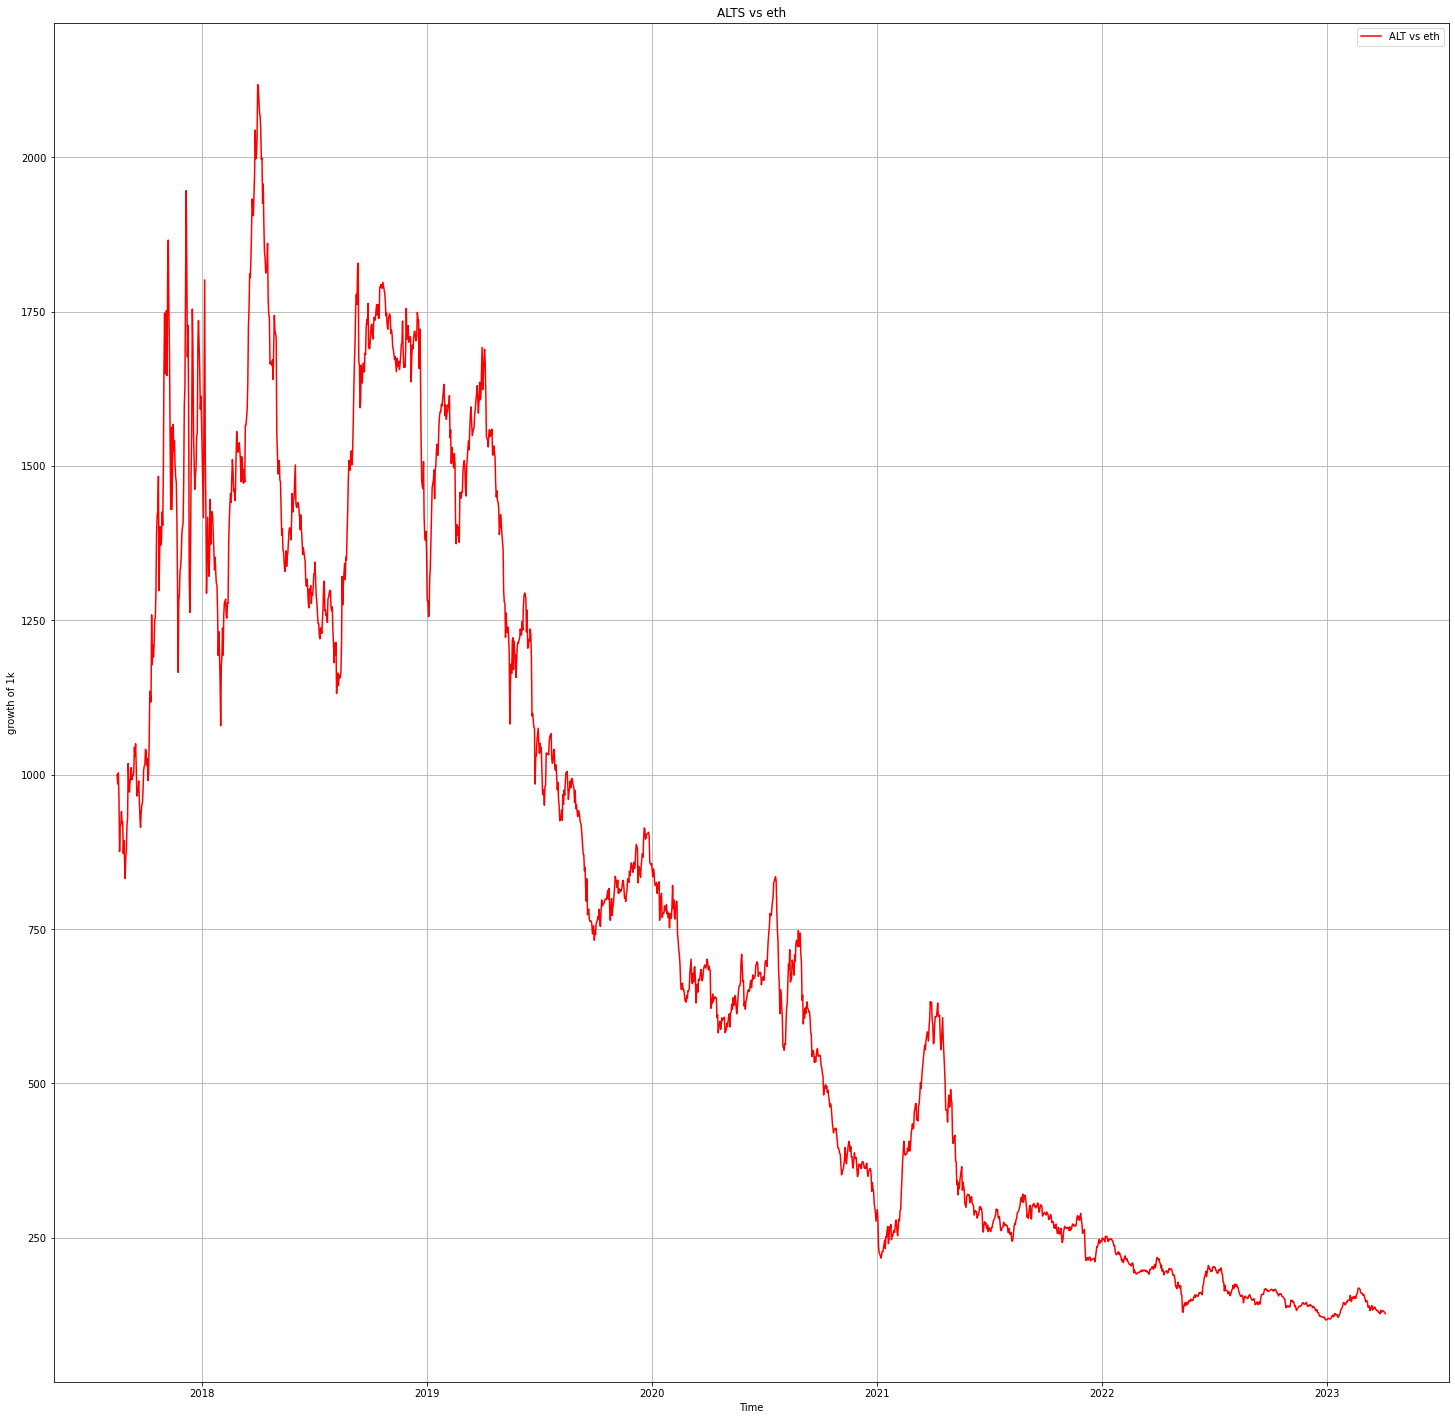

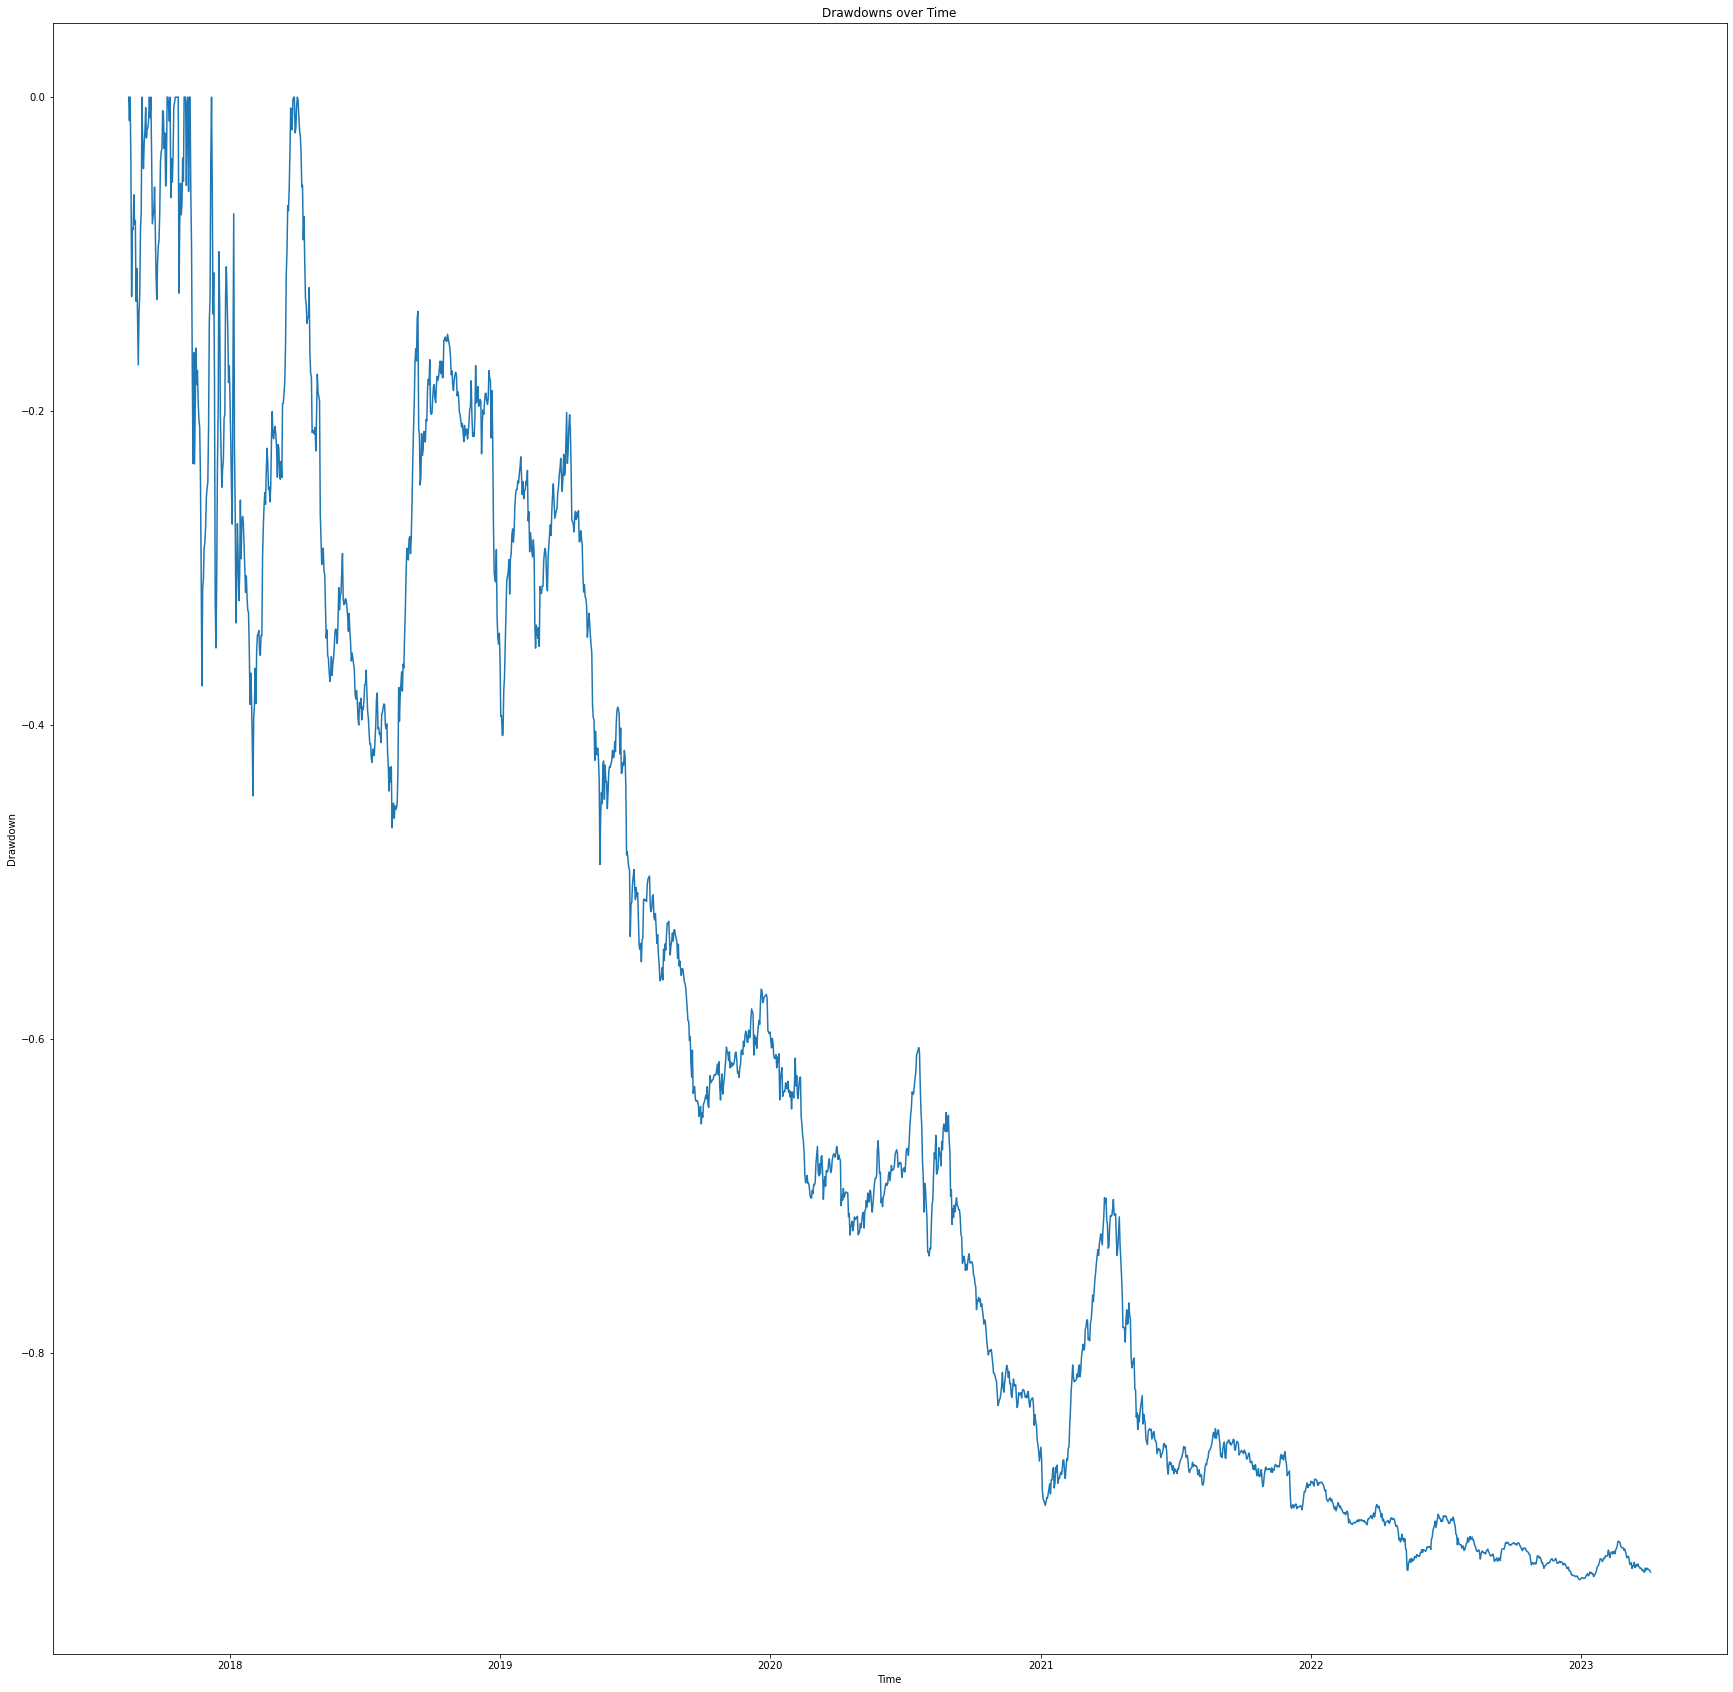

In [22]:
alts_vs__eth(df1)

In [23]:
def eth_vs_alts(complete_fd):
    resemple_data = resample_prices(complete_fd, '1D')
    log_return_table = compute_log_returns(resemple_data)
    # Count non-NaN values in each row
    non_nan_count = log_return_table.count(axis=1)
    # Divide values in each row by the number of non-NaN values
    log_return_table = log_return_table.div(non_nan_count, axis=0)
    port_returns = log_return_table
    all_returns = port_returns.sum(axis=1)
    # calculate the cumulative sum of the log returns
    cumulative_sum_of_log_returns = np.cumsum(all_returns*-1)
    print(f'volatility of portfolio is {(all_returns*-1).std() * (365**0.5)}')
    print(f"average returns are {(all_returns*-1).mean() * 365}")
    print(f"sharpe ration is {((all_returns*-1).mean() * 365) / ((all_returns*-1).std() * (365**0.5))}")
    # calculate the portfolio value using the exponential function
    portfolio_value = np.exp(cumulative_sum_of_log_returns) * 1000
    fig = plt.figure(figsize=(25, 25))
    # plot the portfolio value
    plt.plot(portfolio_value, color = 'red')
    plt.xlabel('Time')
    plt.ylabel('growth of 1k')
    plt.title('ALTS vs eth')
    plt.grid(True)
    plt.legend(['ALT vs eth'])
    # calculate the cumulative sum of the log returns
    cumulative_sum_of_log_returns = np.cumsum(all_returns*-1)

    # calculate the portfolio value using the exponential function
    portfolio_value = np.exp(cumulative_sum_of_log_returns) * 1000

    # calculate the maximum portfolio value up to each time step
    maximum_portfolio_value = np.maximum.accumulate(portfolio_value)

    # calculate the drawdowns
    drawdowns = portfolio_value / maximum_portfolio_value - 1
    fig = plt.figure(figsize=(30, 30))
    # plot the drawdowns
    plt.plot(drawdowns)
    plt.xlabel('Time')
    plt.ylabel('Drawdown')
    plt.title('Drawdowns over Time')
    plt.show()
    monthly_returns = (all_returns* -1).resample('M').sum()
    print(monthly_returns)
    # Plot the monthly returns as a bar chart
    monthly_returns.plot(kind='bar', figsize=(18, 12))
    plt.xlabel('Month')
    plt.ylabel('Return')
    plt.title('Monthly Returns')
    plt.show()
    # Calculate the maximum length of consecutive positive returns in a rolling 4-week window
    consecutive_positives = monthly_returns[monthly_returns < 0].rolling(window=4).apply(lambda x: len(x)).dropna()

    # Calculate the average length of consecutive positive returns
    average_consecutive_positives = consecutive_positives.mean()
    print(average_consecutive_positives)

volatility of portfolio is 0.5448256876970465
average returns are 0.36551800930577705
sharpe ration is 0.6708898232218181


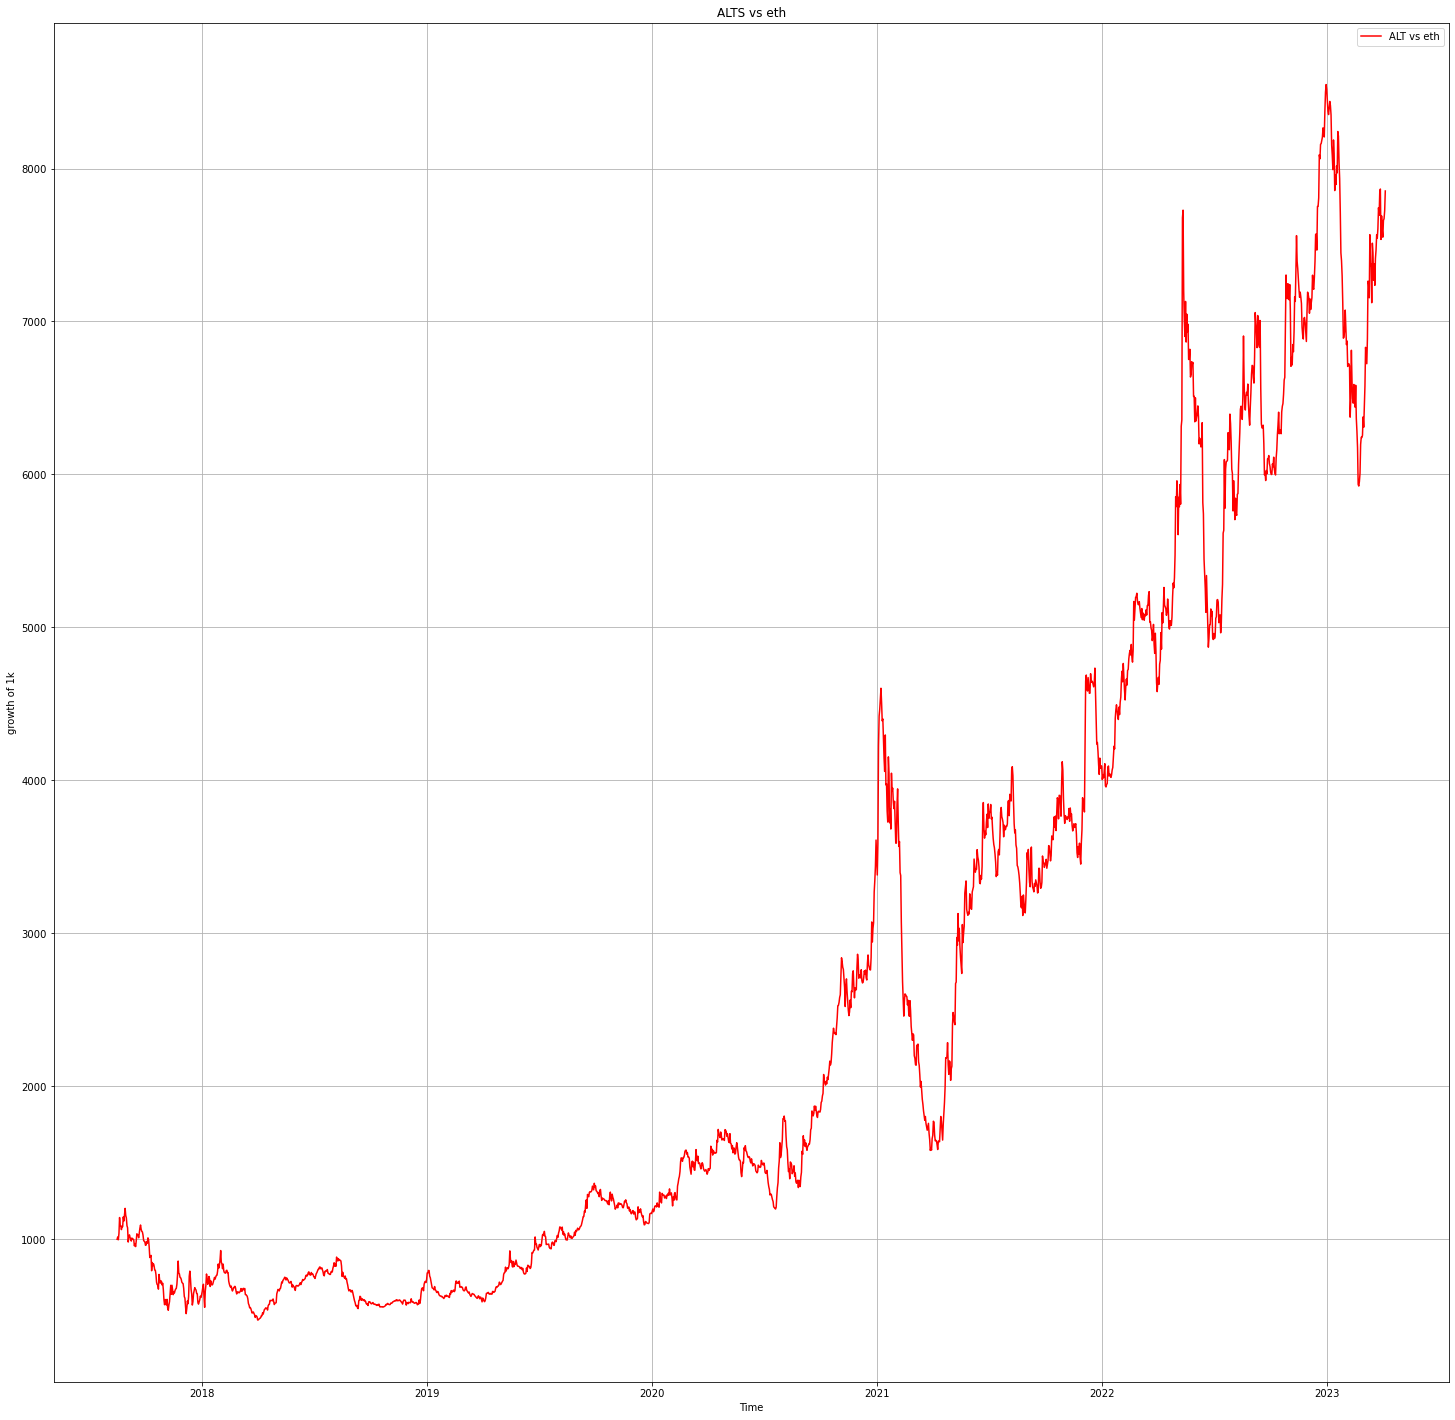

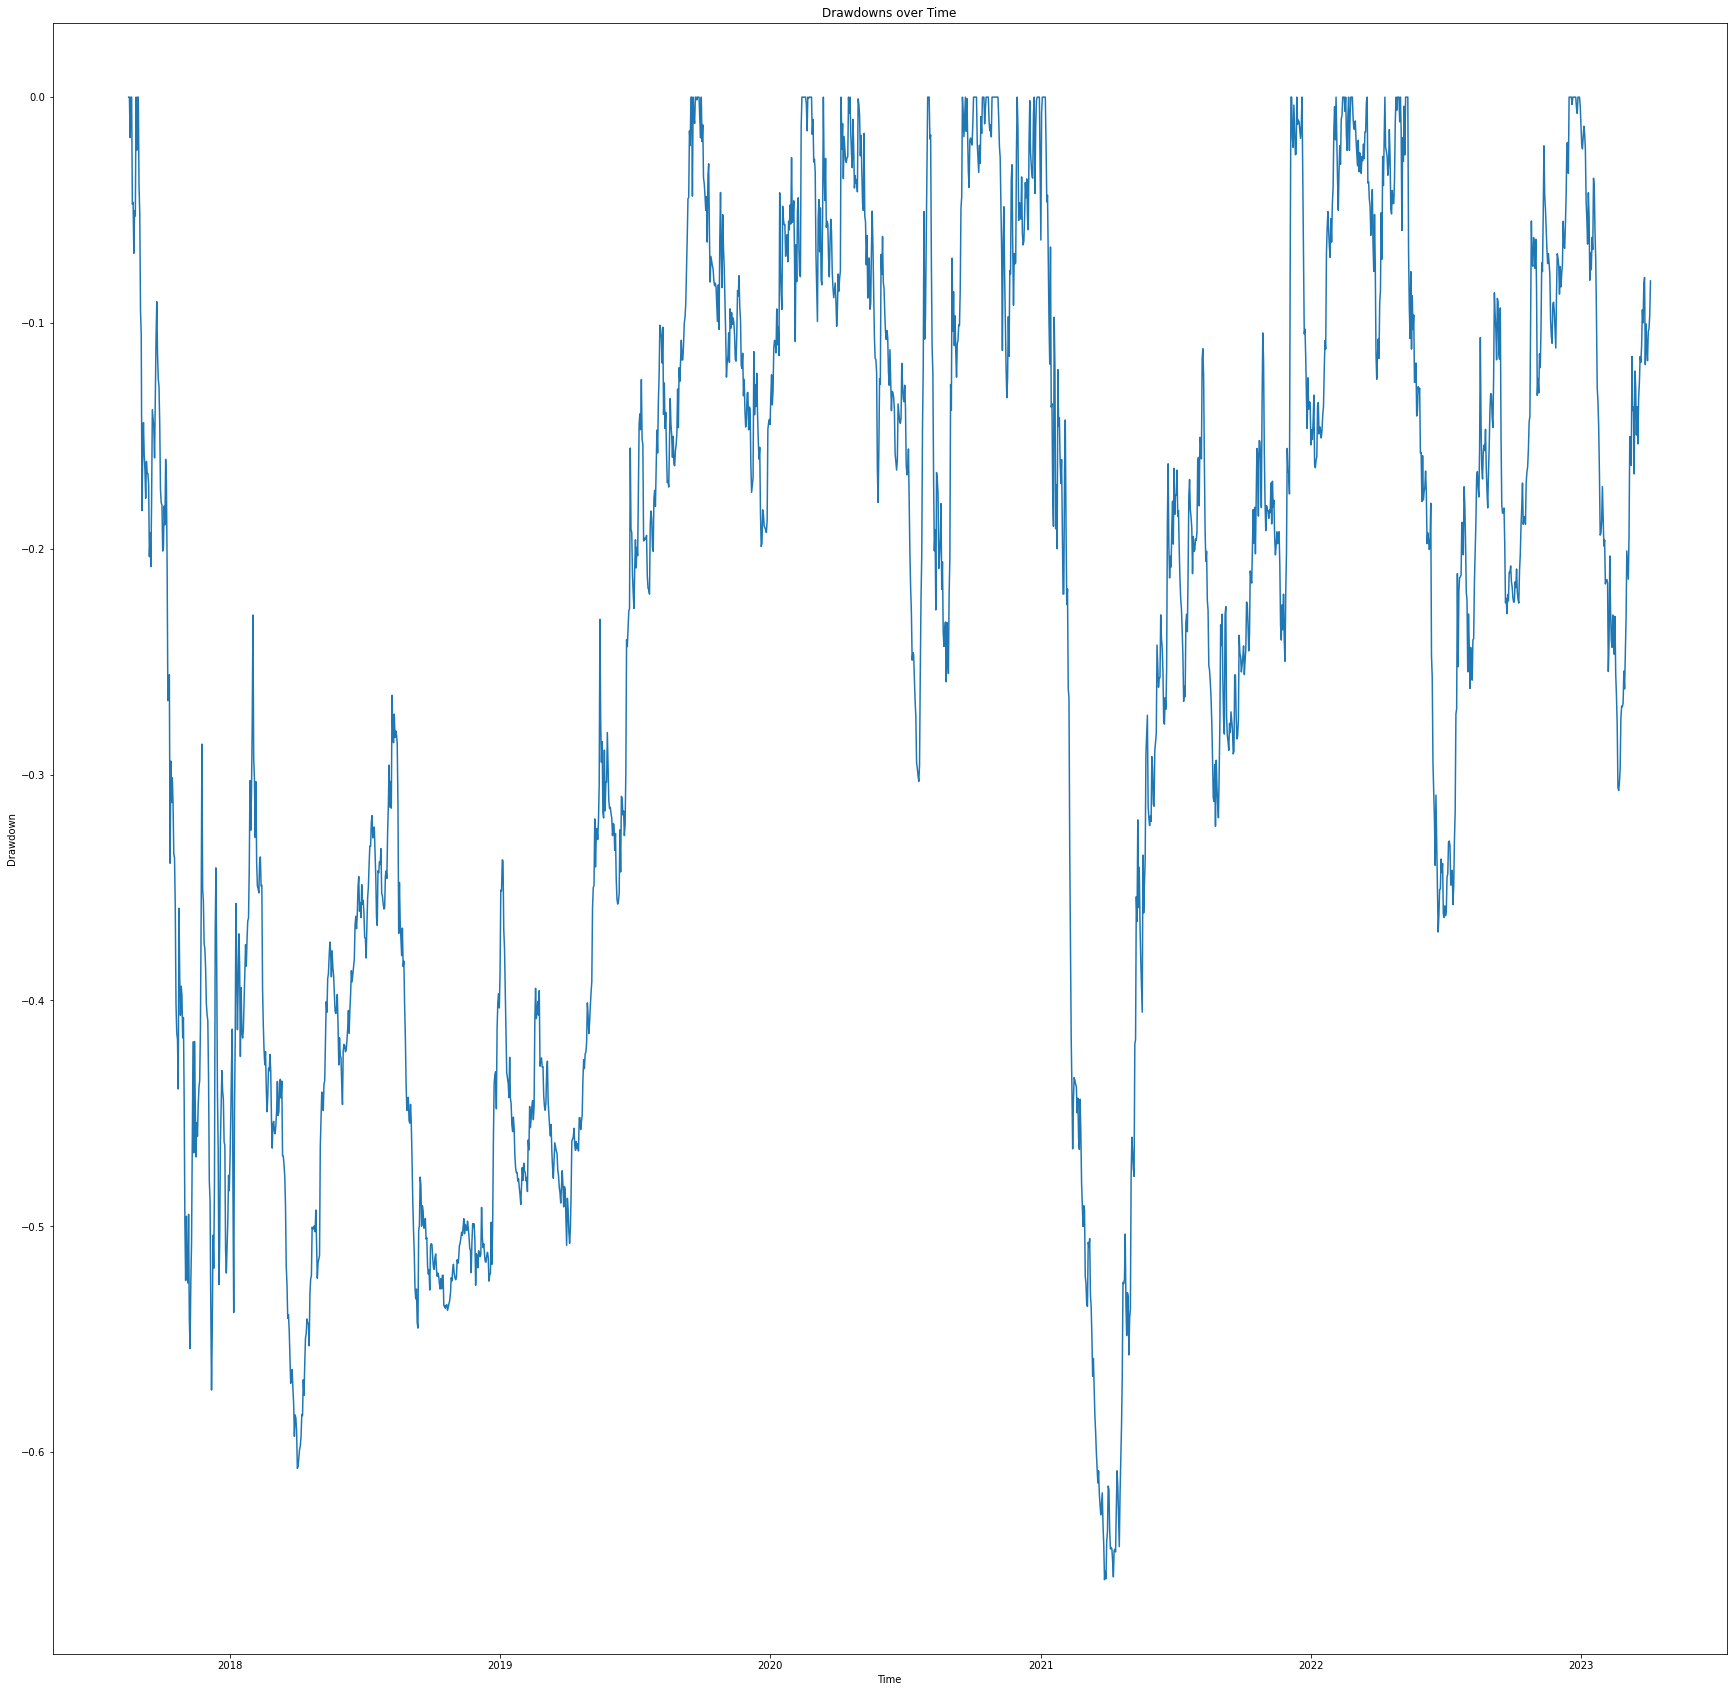

date
2017-08-31    0.144566
2017-09-30   -0.158351
2017-10-31   -0.387612
2017-11-30    0.072386
2017-12-31   -0.149067
                ...   
2022-12-31    0.169244
2023-01-31   -0.203019
2023-02-28   -0.086580
2023-03-31    0.175204
2023-04-30    0.033140
Freq: M, Length: 69, dtype: float64


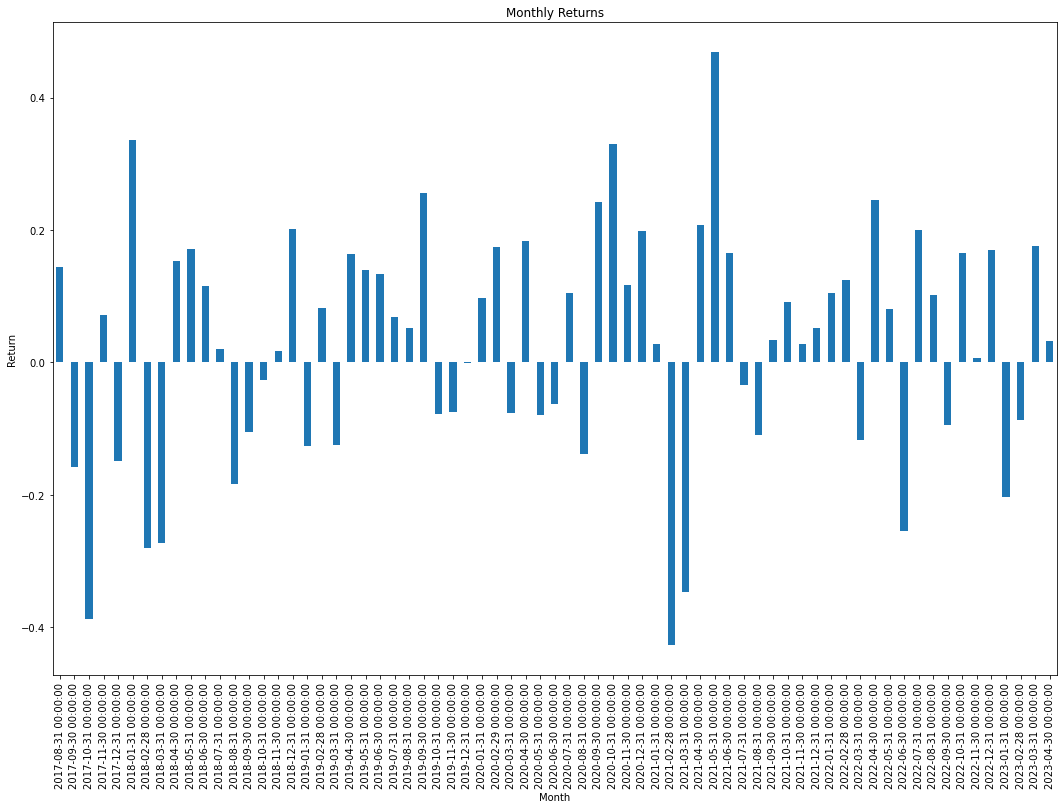

4.0


In [24]:
eth_vs_alts(df1)